MERUBAH MEAN MOTION MENJADI KETINGGIAN


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# Membaca file CSV yang berisi data TLE
df1 = pd.read_excel('TEC GRACE FINAL.xlsx')
df = pd.read_excel('gracefinal.xlsx')
df2 = pd.read_excel('f10grace.xlsx')

# Mengambil kolom Mean Motion, Ballistic Coefficient, dan Mean Motion Dot
mean_motion = df['MEAN_MOTION'].tolist()
ballistic_coef = df['BSTAR'].tolist()
mean_motion_dot = df['MEAN_MOTION_DOT'].tolist()
inc = df['INCLINATION'].tolist()

# Konstanta gravitasi bumi x massa Bumi
GM = 398600.4418  # km^3/s^2
pi = math.pi
secs_per_day = 86400  # jumlah detik dalam satu hari
r = 6371

# Hitung semi-major axis dari nilai Mean Motion
df["MEAN_MOTION"] = df["MEAN_MOTION"].astype(float)
n= df['MEAN_MOTION']

# Hitung semi-major axis dari nilai Mean Motion
df["MEAN_MOTION_DOT"] = df["MEAN_MOTION_DOT"].astype(float)
dn= df['MEAN_MOTION_DOT']

semi= (((GM / (n * 2 * pi / secs_per_day) ** 2) ** (1/3)))
a = semi-r

da = -(2*a/(3*n))*(dn)*1000
#da = -(2/3)*(a/n)*(dn)
da_dt = -2/3 * ((GM)**(1/2))*(n**(-5/3))*(dn)*1000

# Mengubah hasil perhitungan menjadi DataFrame dan menambahkan kolom baru untuk Semi-Major Axis
df_new = pd.DataFrame({'MEAN_MOTION': mean_motion,
                       'BSTAR': ballistic_coef,
                       'MEAN_MOTION-DOT': mean_motion_dot,
                       'Ketinggian (km)': a,
                       'DA (m)': da,
                       'Semi-major (km)':semi,
                       'DA/DT_2 (m)': da_dt})

print(df_new)
# Menyimpan hasil perhitungan dalam file CSV baru
df_new.to_csv('data_ketinggian_satelit.csv', index=False)


      MEAN_MOTION     BSTAR  MEAN_MOTION-DOT  Ketinggian (km)       DA (m)  \
0       15.234253 -0.001390        -0.000329       502.654907     7.236914   
1       15.234660  0.000408         0.000098       502.532599    -2.155094   
2       15.235041  0.000659         0.000158       502.418048    -3.473661   
3       15.235383  0.000708         0.000170       502.315279    -3.736635   
4       15.236233  0.000995         0.000240       502.059584    -5.272270   
...           ...       ...              ...              ...          ...   
5757    16.268350  0.000453         0.014800       208.196072  -126.269793   
5758    16.302615  0.000457         0.020300       198.974206  -165.174992   
5759    16.352502  0.000426         0.030800       185.605169  -233.058695   
5760    16.525143  0.000172         0.204000       139.859959 -1151.031145   
5761    16.525143  0.000172         0.204000       139.859959 -1151.031145   

      Semi-major (km)  DA/DT_2 (m)  
0         6873.654907     

DUAL-Y
GRAFIK KORELASI

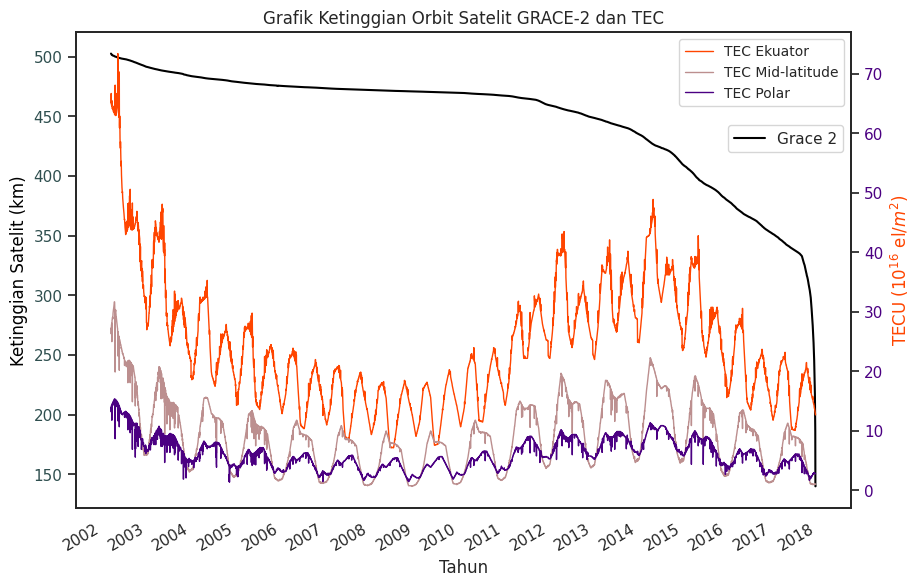

Grafik Ketinggian Orbit Satelit GRACE-2 dan TEC-ek: 0.020507088328155836 dan nilai p-value=  0.11959525706917033
Grafik Ketinggian Orbit Satelit GRACE-2 dan TEC-mid: 0.04060066266895079 dan nilai p-value=  0.0020526224692813733
Grafik Ketinggian Orbit Satelit GRACE-2 dan TEC-pol: 0.016657263124769596 dan nilai p-value=  0.20614740704880966


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate

df = pd.read_excel('gracefinal.xlsx')
df1 = pd.read_excel('TEC GRACE FINAL.xlsx')
df2 = pd.read_excel('f10grace.xlsx')

# Tentukan variabel x dan dua variabel y
x = df['DATE']
y1 = df2["F10.7_OBS"]
y2= a
y3 = df1["EQ"]
y4 = df1["MID"]
y5 = df1["POL"]

# Buat plot
sns.set_style('white')
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})
fig, ax1 = plt.subplots(figsize=(10,7))
# Atur sumbu y1 dan plot data y1
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Ketinggian Satelit (km)', color='black')
ax1.plot(x, y2, color='black', label='Grace 2', linewidth=1.5)
#ax1.plot(x, y2, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='darkslategray')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.82))
plt.xticks(x, rotation=50)
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(x) // 265))
locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator((locator))
plt.gcf().autofmt_xdate()

# Buat sumbu y3 dan plot data y3
ax2 = ax1.twinx()
ax2.set_ylabel('TECU (1$0^1$$^6$ el/$m^2$)', color='orangered')
ax2.plot(x, y3, color='orangered', label='TEC Ekuator')
ax2.plot(x, y4, color='rosybrown', label='TEC Mid-latitude')
ax2.plot(x, y5, color='indigo', label='TEC Polar')
ax2.tick_params(axis='y', labelcolor='indigo')
plt.legend(loc='upper right', fontsize=10)

#_______________________



# Atur judul grafik dan tampilkan
plt.title("Grafik Ketinggian Orbit Satelit GRACE-2 dan TEC", fontsize=12)

plt.show()



#------------------------------------------------------------------------------------------------------------------
import pandas as pd
from scipy.stats import spearmanr

# Hitung korelasi Spearman antara data TEC dan peluruhan orbit
corr, p_value = spearmanr(y2,y3)
corr2, p_value2 = spearmanr(y2,y4)
corr3, p_value3 = spearmanr(y2,y5)

# Print hasil korelasi
print('Grafik Ketinggian Orbit Satelit GRACE-2 dan TEC-ek:', corr, 'dan nilai p-value= ', p_value)
print('Grafik Ketinggian Orbit Satelit GRACE-2 dan TEC-mid:', corr2, 'dan nilai p-value= ', p_value2)
print('Grafik Ketinggian Orbit Satelit GRACE-2 dan TEC-pol:', corr3, 'dan nilai p-value= ', p_value3)

##KALAU RENTANG WAKTU DIPERPENDEK (PUNCAK SIKLUS)


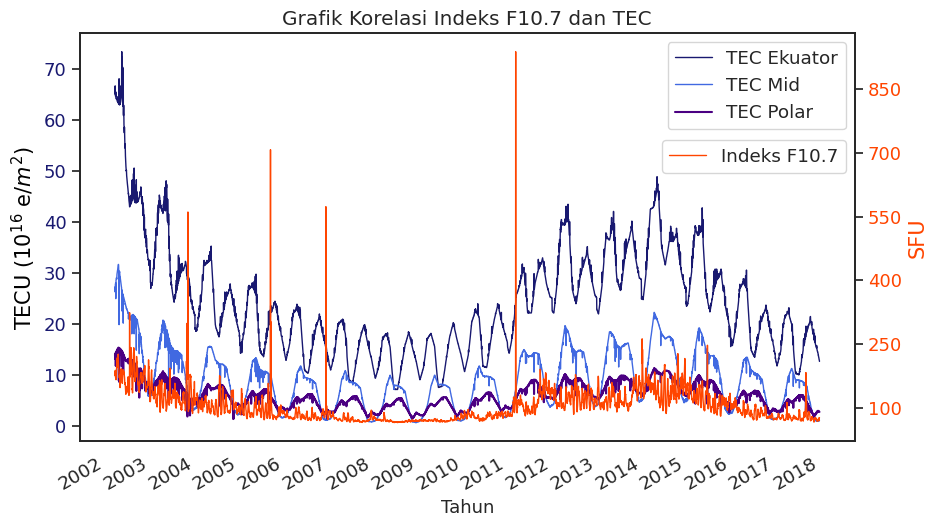

Korelasi antara Indeks F10.7 dan TEC-ek: 0.7887240190453568 P-value:  0.0
Korelasi antara Indeks F10.7 dan TEC-mid: 0.47827404079070407 P-value:  0.0
Korelasi antara Indeks F10.7 dan TEC-pol: 0.6748159179153338 P-value:  0.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import matplotlib.ticker as ticker
import seaborn as sns
df = pd.read_excel('gracefinal.xlsx')
df1 = pd.read_excel('TEC GRACE FINAL.xlsx')
df2 = pd.read_excel('f10grace.xlsx')

# Tentukan variabel x dan dua variabel y
x = df['DATE']
y1 = df2["F10.7_OBS"]
y2= a
y3 = df1["EQ"]
y4 = df1["MID"]
y5 = df1["POL"]
# Buat plot
sns.set_style("white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1})
fig, ax1 = plt.subplots(figsize=(10,6))

# Atur sumbu y1 dan plot data y1
ax1.set_xlabel('Tahun',fontsize=13)
ax1.set_ylabel('TECU (1$0^1$$^6$ e/$m^2$) ', color='black', fontsize=15)
ax1.plot(x, y3, color='midnightblue', label='TEC Ekuator')
ax1.plot(x, y4, color='royalblue', label='TEC Mid')
ax1.plot(x, y5, color='indigo', label='TEC Polar', linewidth=1.5)
#ax1.plot(x, y1, color='green')
#ax1.plot(x, y4, color='yellow')
ax1.tick_params(axis='y', labelcolor='midnightblue', labelsize=13)
plt.legend(loc='best')
plt.xticks(x, rotation=50)
locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator((locator))
plt.gcf().autofmt_xdate()
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(x) // 265))



# Buat sumbu y3 dan plot data y3
ax2 = ax1.twinx()
ax2.set_ylabel('SFU', color='orangered', fontsize=15)
ax2.plot(x, y1,  color='orangered', label= 'Indeks F10.7')
ax2.tick_params(axis='y', labelcolor='orangered', labelsize=13)
plt.yticks(range(100, 901, 150))



#Tambahkan garis vertikal pada sumbu y1
#for x in ax1.get_xticks():
 #   ax1.axvline(x=x, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)


# Atur judul grafik dan tampilkan
plt.title("Grafik Korelasi Indeks F10.7 dan TEC")
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.76))
plt.show()

#--------------------------------------------------------------------------------------------------

import pandas as pd
from scipy.stats import spearmanr
# Hitung korelasi Spearman antara data TEC dan peluruhan orbit
corr, p_value = spearmanr(y1, y3)
corr2, p_value2 = spearmanr(y1, y4)
corr3, p_value3 = spearmanr(y1, y5)

# Print hasil korelasi
print('Korelasi antara Indeks F10.7 dan TEC-ek:', corr, 'P-value: ', p_value)
print('Korelasi antara Indeks F10.7 dan TEC-mid:', corr2, 'P-value: ', p_value2)
print('Korelasi antara Indeks F10.7 dan TEC-pol:', corr3, 'P-value: ', p_value3)




In [ ]:
print(x)

0      2002-03-17
1      2002-03-18
2      2002-03-19
3      2002-03-20
4      2002-03-21
          ...    
5757   2017-12-20
5758   2017-12-21
5759   2017-12-22
5760   2017-12-23
5761   2017-12-24
Name: DATE, Length: 5762, dtype: datetime64[ns]


# GRAFIK KOEF BALISTIK DAN MEAN MOTION DOT

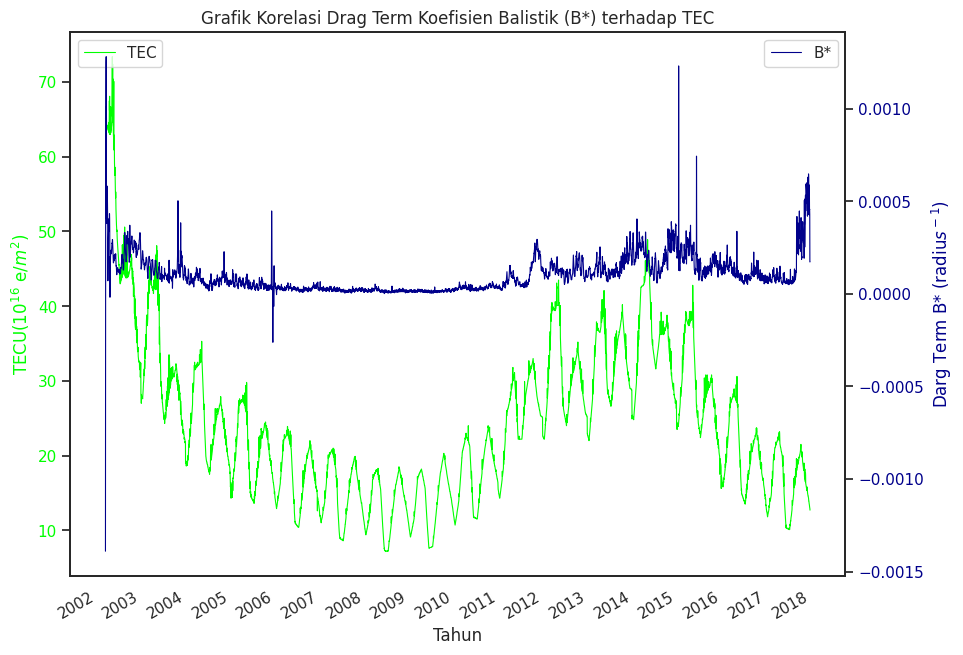

Korelasi antara B* dan TEC: 0.7476256369514996
P-value: 0.0


In [ ]:

# Load data dari file excel
df = pd.read_excel('gracefinal.xlsx')
df1 = pd.read_excel('TEC GRACE FINAL.xlsx')
df2 = pd.read_excel('f10grace.xlsx')


# Tentukan variabel x dan dua variabel y
x = df['DATE']
y1 = df["BSTAR"]
y2= df['MEAN_MOTION_DOT']
y3 = df1["EQ"]
#y4 = df3["MID"]
#y5 = df3["POL"]

# Buat plot
sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 0.8})
fig, ax1 = plt.subplots(figsize=(10,8))

# Buat sumbu y3 dan plot data y3
ax1.set_xlabel('Tahun')
ax1.set_ylabel('TECU($10^1$$^6$ e/$m^2$)', color='lime')
ax1.plot(x, y3, color='lime', label='TEC')
#ax1.plot(x, y3, color='darkred', label='TEC Ekuator')
#ax2.plot(x, y5, color='mistyrose', label='TEC Polar')
ax1.tick_params(axis='y', labelcolor='lime')
plt.legend(loc='upper left')
plt.xticks(x, rotation=50)
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(x) // 265))
locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator((locator))
plt.gcf().autofmt_xdate()

# Atur sumbu y1 dan plot data y1
ax2 = ax1.twinx()
ax2.set_ylabel('Darg Term B* (radiu$s^-$$^1$)', color='darkblue')
ax2.plot(x, y1,  color='darkblue', label= 'B*')
#ax1.plot(x, y1, color='green')
#ax1.plot(x, y4, color='yellow')
ax2.tick_params(axis='y', labelcolor='darkblue')
plt.legend(loc='upper right')

# Atur judul grafik dan tampilkan
plt.title("Grafik Korelasi Drag Term Koefisien Balistik (B*) terhadap TEC")
plt.show()

#--------------------------------------------------------------------------------------------------
from scipy.stats import spearmanr
# Hitung korelasi Spearman antara data TEC dan peluruhan orbit
corr, p_value = spearmanr(y1, y3)

# Print hasil korelasi
print('Korelasi antara B* dan TEC:', corr)
print('P-value:', p_value)


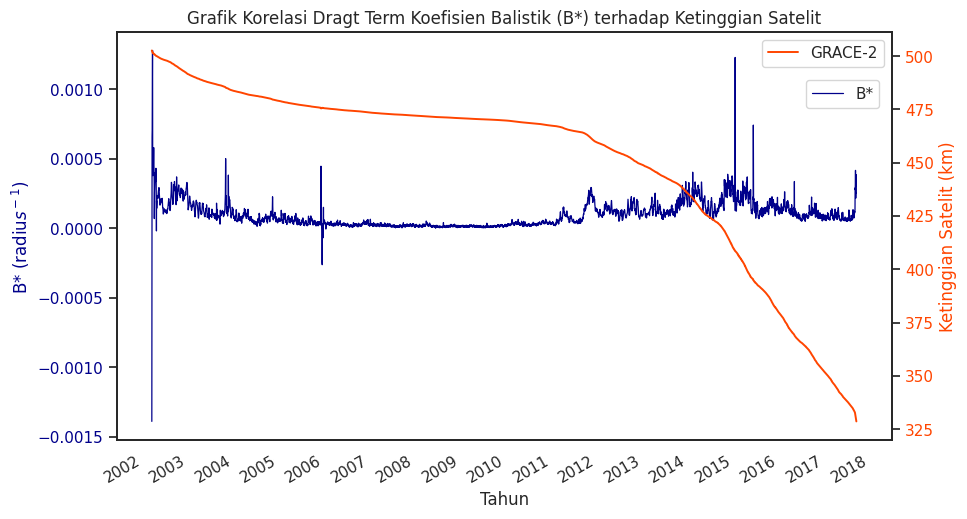

Korelasi antara B* dan TEC: -0.259744077754771
P-value: 5.749686800845174e-88


In [ ]:

# Load data dari file excel
df = pd.read_excel('gracefinal.xlsx')
df1 = pd.read_excel('TEC GRACE FINAL.xlsx')
df2 = pd.read_excel('f10grace.xlsx')


# Tentukan variabel x dan dua variabel y
x = df['DATE']
y1 = df["BSTAR"]
y2= a
y3 = df1["EQ"]
#y4 = df3["MID"]
#y5 = df3["POL"]

x=x.iloc[:-100]
y1=y1.iloc[:-100]
y2=y2.iloc[:-100]

# Buat plot
sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 0.9})
fig, ax1 = plt.subplots(figsize=(10,6))

# Buat sumbu y3 dan plot data y3
ax1.set_xlabel('Tahun')
ax1.set_ylabel('B* (radiu$s^-$$^1$) ', color='darkblue')
ax1.plot(x, y1, color='darkblue', label='B*')
#ax1.plot(x, y3, color='darkred', label='TEC Ekuator')
#ax2.plot(x, y5, color='mistyrose', label='TEC Polar')
ax1.tick_params(axis='y', labelcolor='darkblue')
plt.legend(loc='upper left',  bbox_to_anchor=(0.88, 0.9))
plt.xticks(x, rotation=50)
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(x) // 270))
locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator((locator))
plt.gcf().autofmt_xdate()

# Atur sumbu y1 dan plot data y1
ax2 = ax1.twinx()
ax2.set_ylabel('Ketinggian Satelit (km)', color='orangered')
ax2.plot(x, y2,  color='orangered', label= 'GRACE-2', linewidth=1.4)
#ax1.plot(x, y1, color='green')
#ax1.plot(x, y4, color='yellow')
ax2.tick_params(axis='y', labelcolor='orangered')
plt.legend(loc='upper right')

# Atur judul grafik dan tampilkan
plt.title("Grafik Korelasi Dragt Term Koefisien Balistik (B*) terhadap Ketinggian Satelit")
plt.show()

#--------------------------------------------------------------------------------------------------
from scipy.stats import spearmanr
# Hitung korelasi Spearman antara data TEC dan peluruhan orbit
corr, p_value = spearmanr(y1, y2)

# Print hasil korelasi
print('Korelasi antara B* dan TEC:', corr)
print('P-value:', p_value)


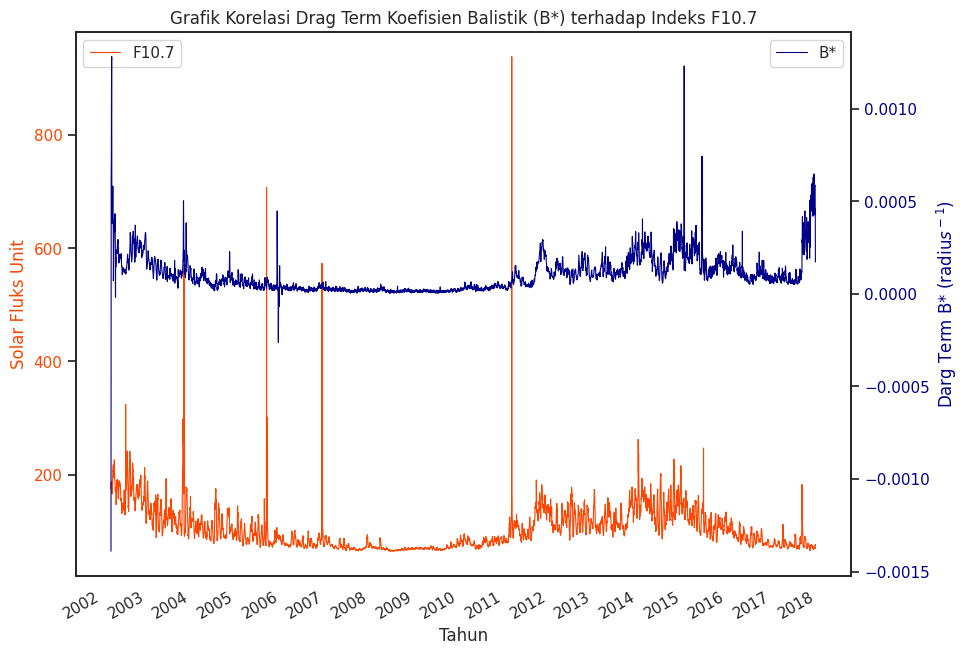

Korelasi antara B* dan F10.7: 0.7957283332263039
P-value: 0.0


In [ ]:

# Load data dari file excel
df = pd.read_excel('gracefinal.xlsx')
df1 = pd.read_excel('TEC GRACE FINAL.xlsx')
df2 = pd.read_excel('f10grace.xlsx')


# Tentukan variabel x dan dua variabel y
x = df['DATE']
y1 = df["BSTAR"]
y2= df['MEAN_MOTION_DOT']
y3 = df2["F10.7_OBS"]
#y4 = df3["MID"]
#y5 = df3["POL"]

# Buat plot
sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 0.8})
fig, ax1 = plt.subplots(figsize=(10,8))

# Buat sumbu y3 dan plot data y3
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Solar Fluks Unit', color='orangered')
ax1.plot(x, y3, color='orangered', label='F10.7')
#ax1.plot(x, y3, color='darkred', label='TEC Ekuator')
#ax2.plot(x, y5, color='mistyrose', label='TEC Polar')
ax1.tick_params(axis='y', labelcolor='orangered')
plt.legend(loc='upper left')
plt.xticks(x, rotation=50)
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(x) // 265))
locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator((locator))
plt.gcf().autofmt_xdate()

# Atur sumbu y1 dan plot data y1
ax2 = ax1.twinx()
ax2.set_ylabel('Darg Term B* (radiu$s^-$$^1$)', color='darkblue')
ax2.plot(x, y1,  color='darkblue', label= 'B*')
#ax1.plot(x, y1, color='green')
#ax1.plot(x, y4, color='yellow')
ax2.tick_params(axis='y', labelcolor='darkblue')
plt.legend(loc='upper right')



# Atur judul grafik dan tampilkan
plt.title("Grafik Korelasi Drag Term Koefisien Balistik (B*) terhadap Indeks F10.7")
plt.show()

#--------------------------------------------------------------------------------------------------
from scipy.stats import spearmanr
# Hitung korelasi Spearman antara data TEC dan peluruhan orbit
corr, p_value = spearmanr(y1, y3)

# Print hasil korelasi
print('Korelasi antara B* dan F10.7:', corr)
print('P-value:', p_value)


# RENTANG WAKTU DIPERSEMPIT MELIHAT TEC DAN F10.7 DI FASE MINIMUM

OCTOBER 2007- NOVEMBER 2009

## COBA SATU TAHUN

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# Membaca file CSV yang berisi data TLE
df = pd.read_excel('gracefinal.xlsx')
df1 = pd.read_excel('TEC GRACE FINAL.xlsx')
df2 = pd.read_excel('f10grace.xlsx')

# Mengambil kolom Mean Motion, Ballistic Coefficient, dan Mean Motion Dot
mean_motion = df['MEAN_MOTION'].tolist()
ballistic_coef = df['BSTAR'].tolist()
mean_motion_dot = df['MEAN_MOTION_DOT'].tolist()
inc = df['INCLINATION'].tolist()

# Konstanta gravitasi bumi x massa Bumi
GM = 398600.4418  # km^3/s^2
pi = math.pi
secs_per_day = 86400  # jumlah detik dalam satu hari
r = 6371

# Hitung semi-major axis dari nilai Mean Motion
df["MEAN_MOTION"] = df["MEAN_MOTION"].astype(float)
n= df['MEAN_MOTION']



a3 = (((GM / (n * 2 * pi / secs_per_day) ** 2) ** (1/3)))-r

# Mengubah hasil perhitungan menjadi DataFrame dan menambahkan kolom baru untuk Semi-Major Axis
df_new = pd.DataFrame({'MEAN_MOTION': mean_motion,
                       'BSTAR': ballistic_coef,
                       'MEAN_MOTION-DOT': mean_motion_dot})

print(df_new)
# Menyimpan hasil perhitungan dalam file CSV baru
#df_new.to_csv('data_ketinggian_satelit.csv', index=False)


      MEAN_MOTION     BSTAR  MEAN_MOTION-DOT
0       15.234253 -0.001390        -0.000329
1       15.234660  0.000408         0.000098
2       15.235041  0.000659         0.000158
3       15.235383  0.000708         0.000170
4       15.236233  0.000995         0.000240
...           ...       ...              ...
5757    16.268350  0.000453         0.014800
5758    16.302615  0.000457         0.020300
5759    16.352502  0.000426         0.030800
5760    16.525143  0.000172         0.204000
5761    16.525143  0.000172         0.204000

[5762 rows x 3 columns]


## DH/DT TURUNAN KETINGGIAN

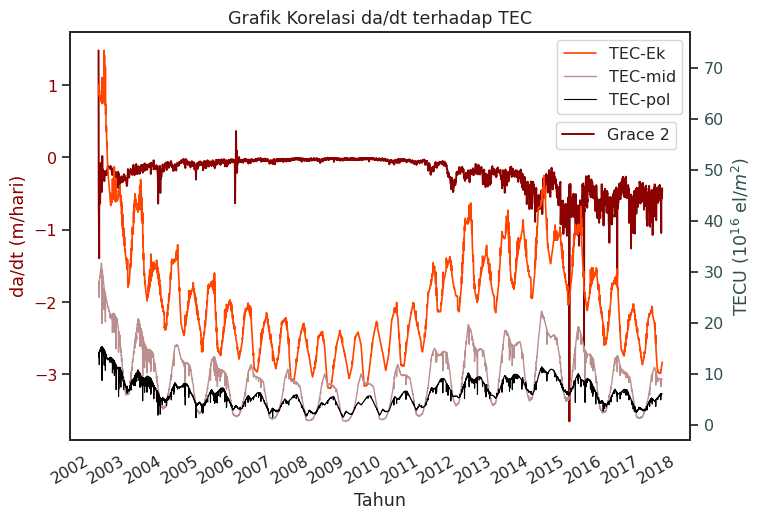

Korelasi antara dh/dt terhadap TEC-eq: -0.6131511616466316
P-value: 0.0
Korelasi antara dh/dt terhadap TEC-mid: -0.48431897887453024
P-value: 0.0
Korelasi antara dh/dt terhadap TEC-pol: -0.3421554546042929
P-value: 6.53643777994772e-154
Korelasi antara dh/dt terhadap f10.7: -0.670576104546042
P-value: 0.0
Korelasi antara dh/dt terhadap b*: -0.9086472843770954
P-value: 0.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Tentukan variabel x dan dua variabel y
data2 = df2['DATE']
y1 = df2["F10.7_OBS"]
data = da_dt
data3 = df1["EQ"]
y4 = df1["MID"]
y5 = df1["POL"]
b=df['BSTAR']

data=data.iloc[:-150]
data2=data2.iloc[:-150]
data3=data3.iloc[:-150]
y4=y4.iloc[:-150]
y5=y5.iloc[:-150]
y1= y1.iloc[:-150]
b=b.iloc[:-150]

# Buat plot
sns.set_style("white")
sns.set_context("notebook", font_scale=1.05, rc={"lines.linewidth": 0.8})
fig, ax1 = plt.subplots(figsize=(8, 6))

# Atur sumbu y1 dan plot data y1
ax1.set_xlabel('Tahun')
ax1.set_ylabel('da/dt (m/hari)', color='darkred')
ax1.plot(data2,data, color='darkred', label='Grace 2', linewidth=1.4)
#ax1.plot(x, y2, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='darkred')
plt.legend(loc='upper center', bbox_to_anchor=(0.88, 0.80))
plt.xticks(x, rotation=50)
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(x) // 275))
locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator((locator))
plt.gcf().autofmt_xdate()

# Buat sumbu y3 dan plot data y3
ax2 = ax1.twinx()
ax2.set_ylabel('TECU (1$0^1$$^6$ el/$m^2$)', color='darkslategray')
ax2.plot(data2, data3, color='orangered', label='TEC-Ek', linewidth=1.2)
ax2.plot(data2, y4, color='rosybrown', label='TEC-mid', linewidth=1)
ax2.plot(data2, y5, color='black', label='TEC-pol')
ax2.tick_params(axis='y', labelcolor='darkslategray')

# Mengatur jumlah tick dan jaraknya pada sumbu-y secara otomatis
num_ticks = 10  # Jumlah tick yang diinginkan
plt.locator_params(axis='y', nbins=num_ticks)

plt.legend(loc='upper right')
# Atur judul grafik dan tampilkan
plt.title("Grafik Korelasi da/dt terhadap TEC")
plt.show()


#------------------------------------------------------------------------------------------------------------------
import pandas as pd
from scipy.stats import spearmanr

# Hitung korelasi Spearman antara data TEC dan peluruhan orbit
corr, p_value = spearmanr(data, data3)
corr2, p_value2 = spearmanr(data, y1)
corr4, p_value4 = spearmanr(data, y5)
corr5, p_value5 = spearmanr(data, y4)
corr3, p_value3 = spearmanr(data, b)


# Print hasil korelasi
print('Korelasi antara dh/dt terhadap TEC-eq:', corr)
print('P-value:', p_value)
print('Korelasi antara dh/dt terhadap TEC-mid:', corr4)
print('P-value:', p_value4)
print('Korelasi antara dh/dt terhadap TEC-pol:', corr5)
print('P-value:', p_value5)
print('Korelasi antara dh/dt terhadap f10.7:', corr2)
print('P-value:', p_value2)
print('Korelasi antara dh/dt terhadap b*:', corr3)
print('P-value:', p_value3)

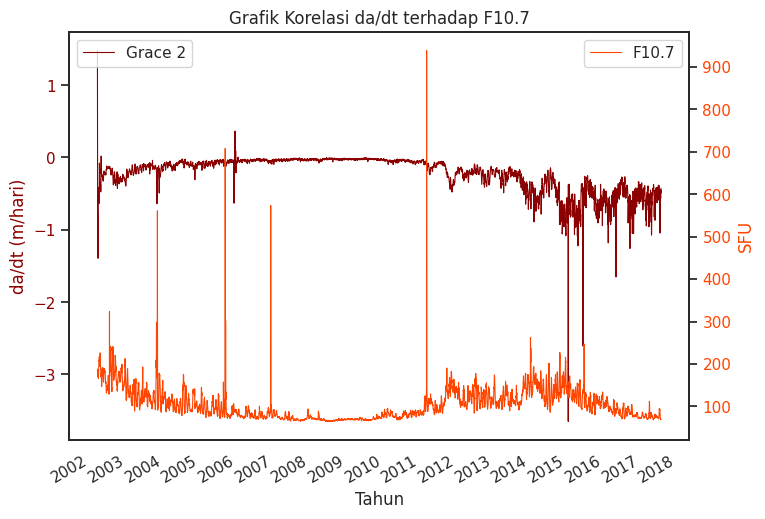

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Tentukan variabel x dan dua variabel y
data2 = df2['DATE']
y1 = df2["F10.7_OBS"]
data = da_dt
data3 = df1["EQ"]
y4 = df1["MID"]
y5 = df1["POL"]
b=df['BSTAR']

data=data.iloc[:-150]
data2=data2.iloc[:-150]
data3=data3.iloc[:-150]
y4=y4.iloc[:-150]
y5=y5.iloc[:-150]
y1= y1.iloc[:-150]
b=b.iloc[:-150]

# Buat plot
sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 0.8})
fig, ax1 = plt.subplots(figsize=(8, 6))

# Atur sumbu y1 dan plot data y1
ax1.set_xlabel('Tahun')
ax1.set_ylabel('da/dt (m/hari)', color='darkred')
ax1.plot(data2,data, color='darkred', label='Grace 2')
#ax1.plot(x, y2, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='darkred')
plt.legend(loc='upper left')
plt.xticks(x, rotation=50)
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(x) // 275))
locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator((locator))
plt.gcf().autofmt_xdate()

# Buat sumbu y3 dan plot data y3
ax2 = ax1.twinx()
ax2.set_ylabel('SFU', color='orangered')
ax2.plot(data2, y1, color='orangered', label='F10.7')
#ax2.plot(data2, y4, color='darkgreen', label='TEC-mid')
#ax2.plot(data2, y5, color='black', label='TEC-pol')
ax2.tick_params(axis='y', labelcolor='orangered')

# Mengatur jumlah tick dan jaraknya pada sumbu-y secara otomatis
num_ticks = 10  # Jumlah tick yang diinginkan
plt.locator_params(axis='y', nbins=num_ticks)

plt.legend(loc='upper right')
# Atur judul grafik dan tampilkan
plt.title("Grafik Korelasi da/dt terhadap F10.7")
plt.show()



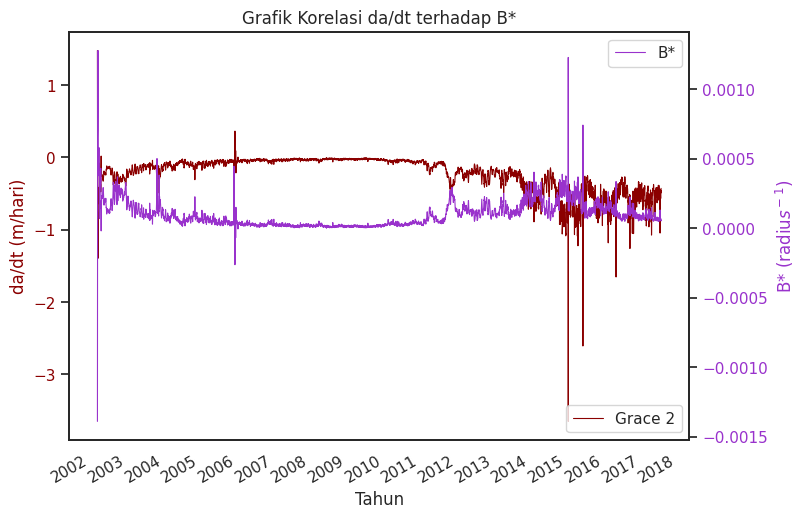

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Tentukan variabel x dan dua variabel y
data2 = df2['DATE']
y1 = df2["F10.7_OBS"]
data = da_dt
data3 = df1["EQ"]
y4 = df1["MID"]
y5 = df1["POL"]
b=df['BSTAR']

data=data.iloc[:-150]
data2=data2.iloc[:-150]
data3=data3.iloc[:-150]
y4=y4.iloc[:-150]
y5=y5.iloc[:-150]
y1= y1.iloc[:-150]
b=b.iloc[:-150]

# Buat plot
sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 0.8})
fig, ax1 = plt.subplots(figsize=(8, 6))

# Atur sumbu y1 dan plot data y1
ax1.set_xlabel('Tahun')
ax1.set_ylabel('da/dt (m/hari)', color='darkred')
ax1.plot(data2,data, color='darkred', label='Grace 2')
#ax1.plot(x, y2, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='darkred')
plt.legend(loc='lower right')
plt.xticks(x, rotation=50)
locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator((locator))
plt.gcf().autofmt_xdate()
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(x) // 275))


# Buat sumbu y3 dan plot data y3
ax2 = ax1.twinx()
ax2.set_ylabel('B* (radiu$s^-$$^1$)', color='darkorchid')
ax2.plot(data2, b, color='darkorchid', label='B*')
#ax2.plot(data2, y4, color='darkgreen', label='TEC-mid')
#ax2.plot(data2, y5, color='black', label='TEC-pol')
ax2.tick_params(axis='y', labelcolor='darkorchid')


plt.legend(loc='upper right')
# Atur judul grafik dan tampilkan
plt.title("Grafik Korelasi da/dt terhadap B*")
plt.show()



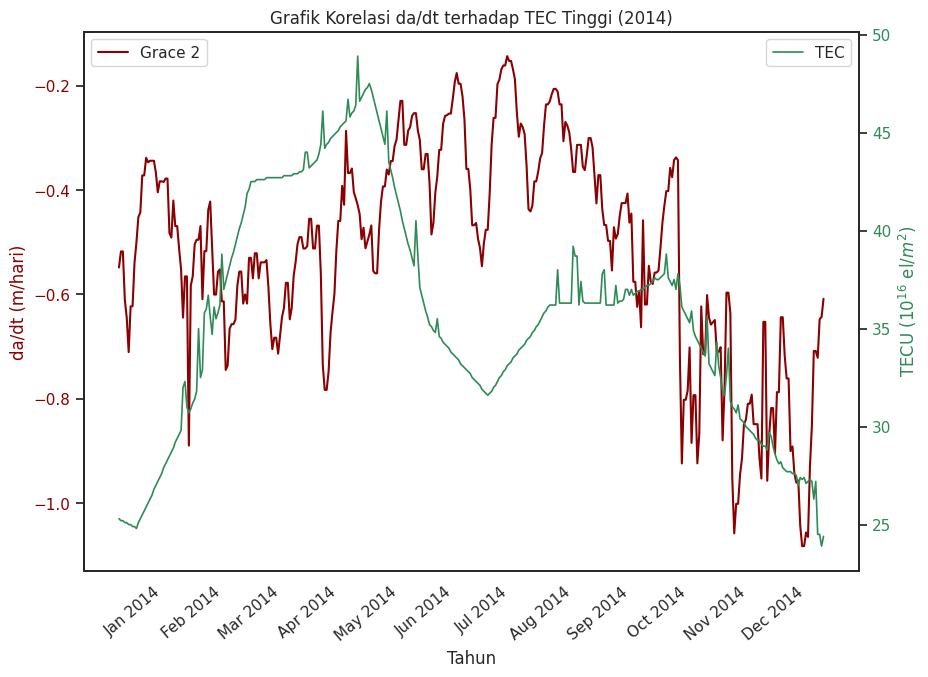

Korelasi antara dh/dt terhadap F10.7*: 0.19016524776507726
P-value: 0.0002632684652365376


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan variabel x dan dua variabel y
data2 = df2['DATE']
y1 = df2["F10.7_OBS"]
data = da_dt
data3 = df1["EQ"]
y4 = df1["MID"]
y5 = df1["POL"]
b=df['BSTAR']



data=data.iloc[4310:-1088]
data2=data2.iloc[4310:-1088]
data3=data3.iloc[4310:-1088]
y1= y1.iloc[4310:-1088]
b=b.iloc[4310:-1088]
# Buat plot
sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1.5})
fig, ax1 = plt.subplots(figsize=(10,7))

# Atur sumbu y1 dan plot data y1
ax1.set_xlabel('Tahun')
ax1.set_ylabel('da/dt (m/hari)', color='darkred')
ax1.plot(data2,data, color='darkred', label='Grace 2')
#ax1.plot(x, y2, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='darkred')
plt.legend(loc='upper left')
plt.xticks(data2, data2.dt.strftime('%b %Y'), rotation=40)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(data2) // 24))


# Buat sumbu y3 dan plot data y3
ax2 = ax1.twinx()
ax2.set_ylabel('TECU (1$0^1$$^6$ el/$m^2$)', color='seagreen')
ax2.plot(data2, data3, color='seagreen', label='TEC', linewidth=1.2)
#ax2.plot(x, y4, color='tab:blue')
#ax2.plot(x, y5, color='tab:purple')
ax2.tick_params(axis='y', labelcolor='seagreen')



plt.legend(loc='upper right')
# Atur judul grafik dan tampilkan
plt.title("Grafik Korelasi da/dt terhadap TEC Tinggi (2014)")
plt.show()


#------------------------------------------------------------------------------------------------------------------
import pandas as pd
from scipy.stats import spearmanr

# Hitung korelasi Spearman antara data TEC dan peluruhan orbit

corr3, p_value3 = spearmanr(data, data3)


# Print hasil korelasi
print('Korelasi antara dh/dt terhadap F10.7*:', corr3)
print('P-value:', p_value3)


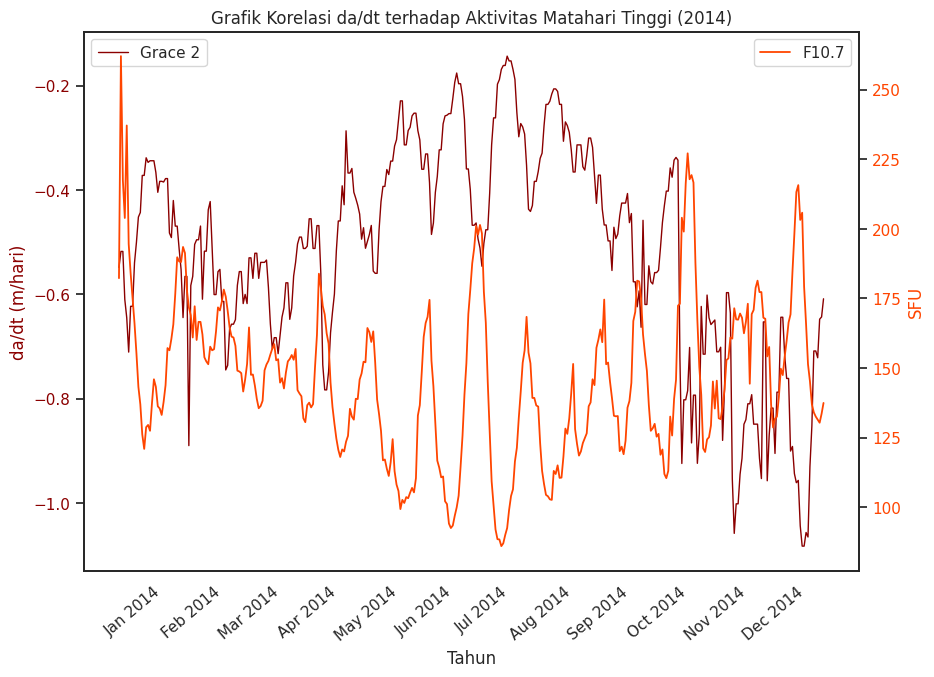

Korelasi antara dh/dt terhadap TEC: 0.19016524776507726
P-value: 0.0002632684652365376
Korelasi antara dh/dt terhadap f10.7: -0.6415886243603666
P-value: 1.3160965162204756e-43
Korelasi antara dh/dt terhadap b*: -0.980006014362145
P-value: 6.17210313469349e-256


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan variabel x dan dua variabel y
data2 = df2['DATE']
y1 = df2["F10.7_OBS"]
data = da_dt
data3 = df1["EQ"]
y4 = df1["MID"]
y5 = df1["POL"]
b=df['BSTAR']


data=data.iloc[4310:-1088]
data2=data2.iloc[4310:-1088]
data3=data3.iloc[4310:-1088]
y1= y1.iloc[4310:-1088]
b=b.iloc[4310:-1088]

# Buat plot
sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})
fig, ax1 = plt.subplots(figsize=(10,7))

# Atur sumbu y1 dan plot data y1
ax1.set_xlabel('Tahun')
ax1.set_ylabel('da/dt (m/hari)', color='darkred')
ax1.plot(data2,data, color='darkred', label='Grace 2')
#ax1.plot(x, y2, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='darkred')
plt.legend(loc='upper left')
plt.xticks(data2, data2.dt.strftime('%b %Y'), rotation=40)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(data2) // 24))

# Buat sumbu y3 dan plot data y3
ax2 = ax1.twinx()
ax2.set_ylabel('SFU', color='orangered')
ax2.plot(data2, y1, color='orangered', label='F10.7', linewidth=1.3)
#ax2.plot(x, y4, color='tab:blue')
#ax2.plot(x, y5, color='tab:purple')
ax2.tick_params(axis='y', labelcolor='orangered')


plt.legend(loc='upper right')
# Atur judul grafik dan tampilkan
plt.title("Grafik Korelasi da/dt terhadap Aktivitas Matahari Tinggi (2014)")
plt.show()


#------------------------------------------------------------------------------------------------------------------
import pandas as pd
from scipy.stats import spearmanr

# Hitung korelasi Spearman antara data TEC dan peluruhan orbit
corr, p_value = spearmanr(data, data3)
corr2, p_value2 = spearmanr(data, y1)
corr3, p_value3 = spearmanr(data, b)


# Print hasil korelasi
print('Korelasi antara dh/dt terhadap TEC:', corr)
print('P-value:', p_value)
print('Korelasi antara dh/dt terhadap f10.7:', corr2)
print('P-value:', p_value2)
print('Korelasi antara dh/dt terhadap b*:', corr3)
print('P-value:', p_value3)

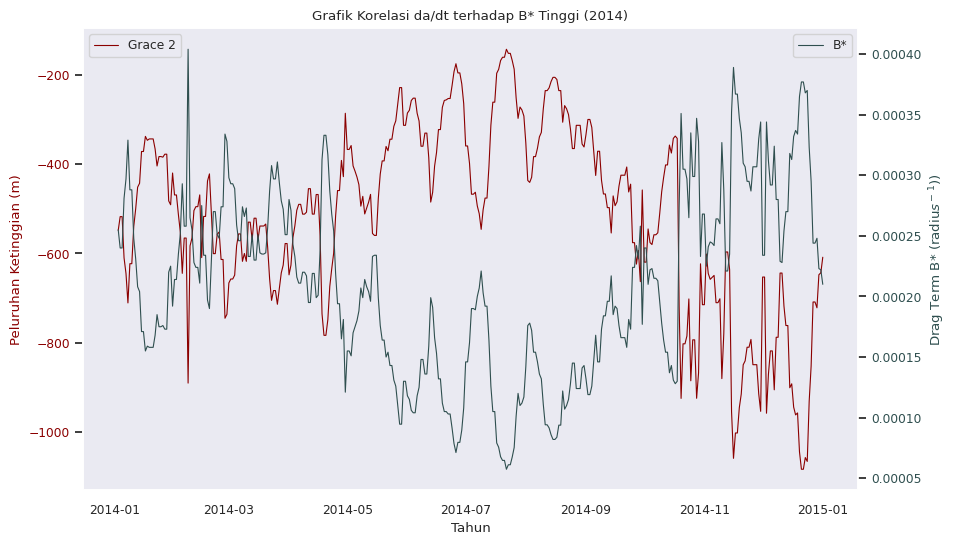

Korelasi antara dh/dt terhadap F10.7*: -0.980006014362145
P-value: 6.17210313469349e-256


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan variabel x dan dua variabel y
data2 = df2['DATE']
y1 = df2["F10.7_OBS"]
data = da_dt*1000
data3 = df1["EQ"]
y4 = df1["MID"]
y5 = df1["POL"]
b=df['BSTAR']



data=data.iloc[4310:-1088]
data2=data2.iloc[4310:-1088]
data3=data3.iloc[4310:-1088]
y1= y1.iloc[4310:-1088]
b=b.iloc[4310:-1088]
# Buat plot
sns.set_style("dark")
sns.set_context("notebook", font_scale=0.8, rc={"lines.linewidth": 0.8})
fig, ax1 = plt.subplots(figsize=(10, 6))

# Atur sumbu y1 dan plot data y1
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Peluruhan Ketinggian (m)', color='darkred')
ax1.plot(data2,data, color='darkred', label='Grace 2')
#ax1.plot(x, y2, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='darkred')
plt.legend(loc='upper left')
#plt.xticks(data2, data2.dt.strftime('%b %Y'), rotation=60)
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(data2) // 72))

# Buat sumbu y3 dan plot data y3
ax2 = ax1.twinx()
ax2.set_ylabel('Drag Term B* (radiu$s^-$$^1$))', color='darkslategrey')
ax2.plot(data2, b, color='darkslategrey', label='B*')
#ax2.plot(x, y4, color='tab:blue')
#ax2.plot(x, y5, color='tab:purple')
ax2.tick_params(axis='y', labelcolor='darkslategrey')



plt.legend(loc='upper right')
# Atur judul grafik dan tampilkan
plt.title("Grafik Korelasi da/dt terhadap B* Tinggi (2014)")
plt.show()


#------------------------------------------------------------------------------------------------------------------
import pandas as pd
from scipy.stats import spearmanr

# Hitung korelasi Spearman antara data TEC dan peluruhan orbit

corr3, p_value3 = spearmanr(data, b)


# Print hasil korelasi
print('Korelasi antara dh/dt terhadap F10.7*:', corr3)
print('P-value:', p_value3)


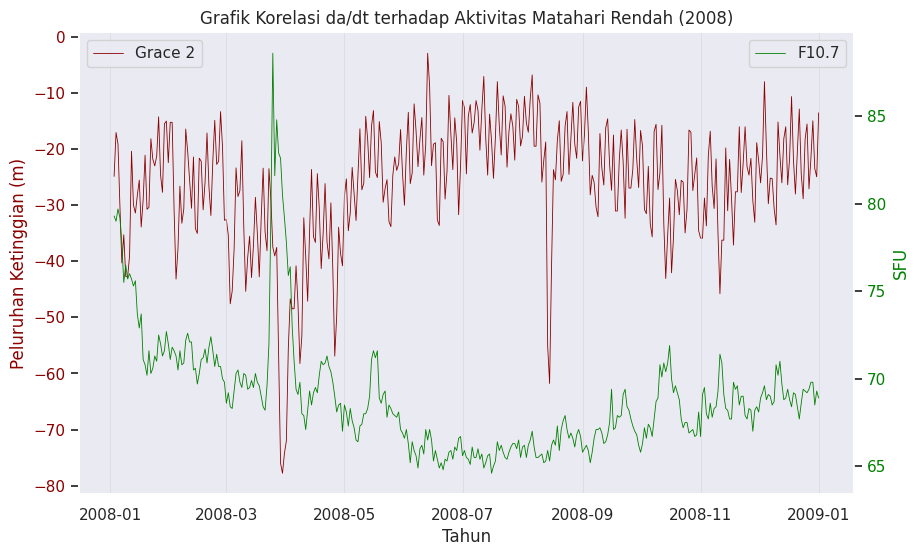

Korelasi antara dh/dt terhadap TEC: -0.4882578923641008
P-value: 2.905314127575505e-23
Korelasi antara dh/dt terhadap f10.7: -0.41977581730571517
P-value: 5.173755763858593e-17
Korelasi antara dh/dt terhadap b*: -0.9998866649896354
P-value: 0.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan variabel x dan dua variabel y
data2 = df2['DATE']
y1 = df2["F10.7_OBS"]
data = da_dt*1000
data3 = df1["EQ"]
y4 = df1["MID"]
y5 = df1["POL"]
b=df['BSTAR']



#data=data.iloc[3200:-150]
#data2=data2.iloc[3200:-150]
#data3=data3.iloc[3200:-150]
#y1= y1.iloc[3200:-150]
#b=b.iloc[3200:-150]
data=data.iloc[2118:-3279]
data2=data2.iloc[2118:-3279]
data3=data3.iloc[2118:-3279]
y1= y1.iloc[2118:-3279]
b=b.iloc[2118:-3279]

# Buat plot
sns.set_style("dark")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 0.6})
fig, ax1 = plt.subplots(figsize=(10, 6))

# Atur sumbu y1 dan plot data y1
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Peluruhan Ketinggian (m)', color='darkred')
ax1.plot(data2,data, color='darkred', label='Grace 2')
#ax1.plot(x, y2, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='darkred')
plt.legend(loc='upper left')
#plt.xticks(data2, data2.dt.strftime('%b %Y'), rotation=60)
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(data2) // 48))

# Buat sumbu y3 dan plot data y3
ax2 = ax1.twinx()
ax2.set_ylabel('SFU', color='green')
ax2.plot(data2, y1, color='green', label='F10.7')
#ax2.plot(x, y4, color='tab:blue')
#ax2.plot(x, y5, color='tab:purple')
ax2.tick_params(axis='y', labelcolor='green')


#Tambahkan garis vertikal pada sumbu y1
for x in ax1.get_xticks():
    ax1.axvline(x=x, color='lightgray', linestyle='-', linewidth=0.7, alpha=0.5)



plt.legend(loc='upper right')
# Atur judul grafik dan tampilkan
plt.title("Grafik Korelasi da/dt terhadap Aktivitas Matahari Rendah (2008)")
plt.show()


#------------------------------------------------------------------------------------------------------------------
import pandas as pd
from scipy.stats import spearmanr

# Hitung korelasi Spearman antara data TEC dan peluruhan orbit
corr, p_value = spearmanr(data, data3)
corr2, p_value2 = spearmanr(data, y1)
corr3, p_value3 = spearmanr(data, b)


# Print hasil korelasi
print('Korelasi antara dh/dt terhadap TEC:', corr)
print('P-value:', p_value)
print('Korelasi antara dh/dt terhadap f10.7:', corr2)
print('P-value:', p_value2)
print('Korelasi antara dh/dt terhadap b*:', corr3)
print('P-value:', p_value3)

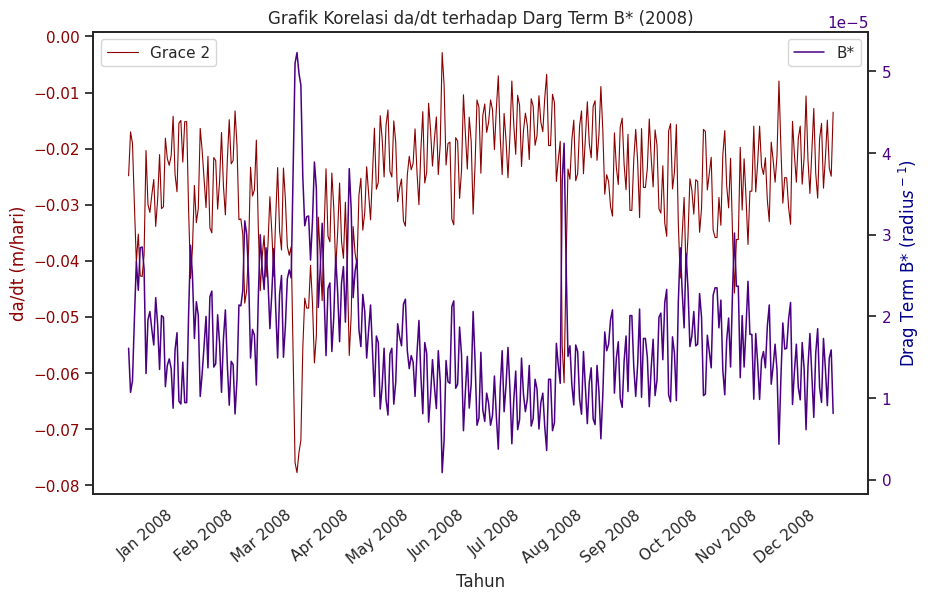

Korelasi antara dh/dt terhadap TEC: -0.4882578923641008
P-value: 2.905314127575505e-23
Korelasi antara dh/dt terhadap f10.7: -0.41977581730571517
P-value: 5.173755763858593e-17
Korelasi antara dh/dt terhadap b*: -0.9998866649896354
P-value: 0.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan variabel x dan dua variabel y
data2 = df2['DATE']
y1 = df2["F10.7_OBS"]
data = da_dt
data3 = df1["EQ"]
y4 = df1["MID"]
y5 = df1["POL"]
b=df['BSTAR']



#data=data.iloc[3200:-150]
#data2=data2.iloc[3200:-150]
#data3=data3.iloc[3200:-150]
#y1= y1.iloc[3200:-150]
#b=b.iloc[3200:-150]
data=data.iloc[2118:-3279]
data2=data2.iloc[2118:-3279]
data3=data3.iloc[2118:-3279]
y1= y1.iloc[2118:-3279]
b=b.iloc[2118:-3279]

# Buat plot
sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 0.8})
fig, ax1 = plt.subplots(figsize=(10, 6))

# Atur sumbu y1 dan plot data y1
ax1.set_xlabel('Tahun')
ax1.set_ylabel('da/dt (m/hari)', color='darkred')
ax1.plot(data2,data, color='darkred', label='Grace 2')
#ax1.plot(x, y2, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='darkred')
plt.legend(loc='upper left')
plt.xticks(data2, data2.dt.strftime('%b %Y'), rotation=40)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(data2) // 24))

# Buat sumbu y3 dan plot data y3
ax2 = ax1.twinx()
ax2.set_ylabel('Drag Term B* (radiu$s^-$$^1$)', color='darkblue')
ax2.plot(data2, b, color='indigo', label='B*', linewidth=1.1)
#ax2.plot(x, y4, color='tab:blue')
#ax2.plot(x, y5, color='tab:purple')
ax2.tick_params(axis='y', labelcolor='indigo')


#Tambahkan garis vertikal pada sumbu y1
#for x in ax1.get_xticks():
 #   ax1.axvline(x=x, color='lightgray', linestyle='-', linewidth=0.7, alpha=0.5)



plt.legend(loc='upper right')
# Atur judul grafik dan tampilkan
plt.title("Grafik Korelasi da/dt terhadap Darg Term B* (2008)")
plt.show()


#------------------------------------------------------------------------------------------------------------------
import pandas as pd
from scipy.stats import spearmanr

# Hitung korelasi Spearman antara data TEC dan peluruhan orbit
corr, p_value = spearmanr(data, data3)
corr2, p_value2 = spearmanr(data, y1)
corr3, p_value3 = spearmanr(data, b)


# Print hasil korelasi
print('Korelasi antara dh/dt terhadap TEC:', corr)
print('P-value:', p_value)
print('Korelasi antara dh/dt terhadap f10.7:', corr2)
print('P-value:', p_value2)
print('Korelasi antara dh/dt terhadap b*:', corr3)
print('P-value:', p_value3)

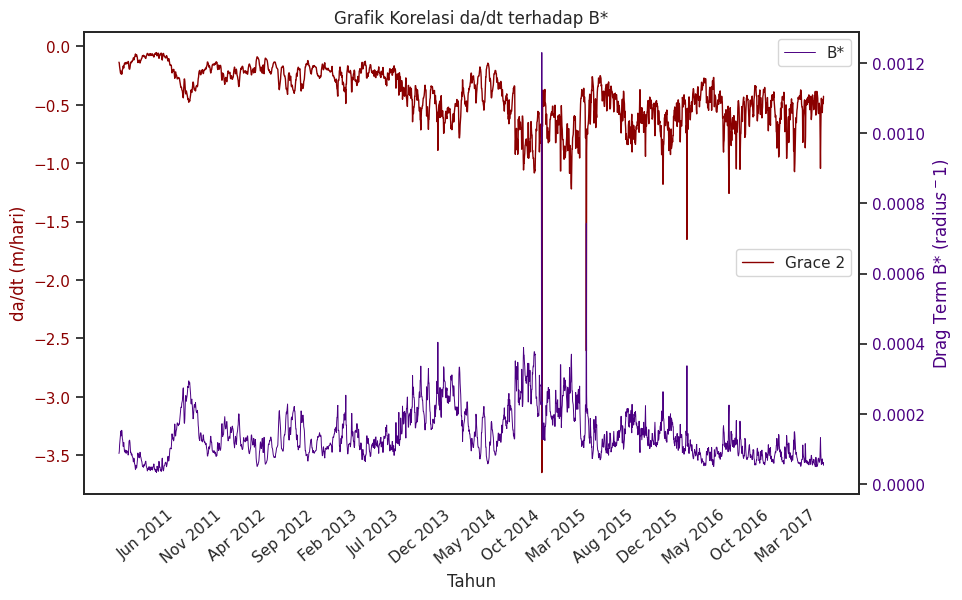

Korelasi antara dh/dt terhadap b*: -0.5457439185622026
P-value: 1.3148892464646728e-179


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan variabel x dan dua variabel y
data2 = df2['DATE']
y1 = df2["F10.7_OBS"]
data = da_dt
data3 = df1["EQ"]
y4 = df1["MID"]
y5 = df1["POL"]
b=df['BSTAR']



data=data.iloc[3300:-150]
data2=data2.iloc[3300:-150]
data3=data3.iloc[3300:-150]
y1= y1.iloc[3300:-150]
b=b.iloc[3300:-150]


# Buat plot
sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 0.7})
fig, ax1 = plt.subplots(figsize=(10, 6))

# Atur sumbu y1 dan plot data y1
ax1.set_xlabel('Tahun')
ax1.set_ylabel('da/dt (m/hari)', color='darkred')
ax1.plot(data2,data, color='darkred', label='Grace 2', linewidth=1)
#ax1.plot(x, y2, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='darkred')
plt.legend(loc='center right')
plt.xticks(data2, data2.dt.strftime('%b %Y'), rotation=40)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(data2) // 96))

# Buat sumbu y3 dan plot data y3
ax2 = ax1.twinx()
ax2.set_ylabel('Drag Term B* (radiu$s^-$$1$)', color='indigo')
ax2.plot(data2, b, color='indigo', label='B*')
#ax2.plot(x, y4, color='tab:blue')
#ax2.plot(x, y5, color='tab:purple')
ax2.tick_params(axis='y', labelcolor='indigo')



plt.legend(loc='upper right')
# Atur judul grafik dan tampilkan
plt.title("Grafik Korelasi da/dt terhadap B*")
plt.show()


#------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------
import pandas as pd
from scipy.stats import spearmanr

# Hitung korelasi Spearman antara data TEC dan peluruhan orbit

corr3, p_value3 = spearmanr(data, b)


# Print hasil korelasi
print('Korelasi antara dh/dt terhadap b*:', corr3)
print('P-value:', p_value3)


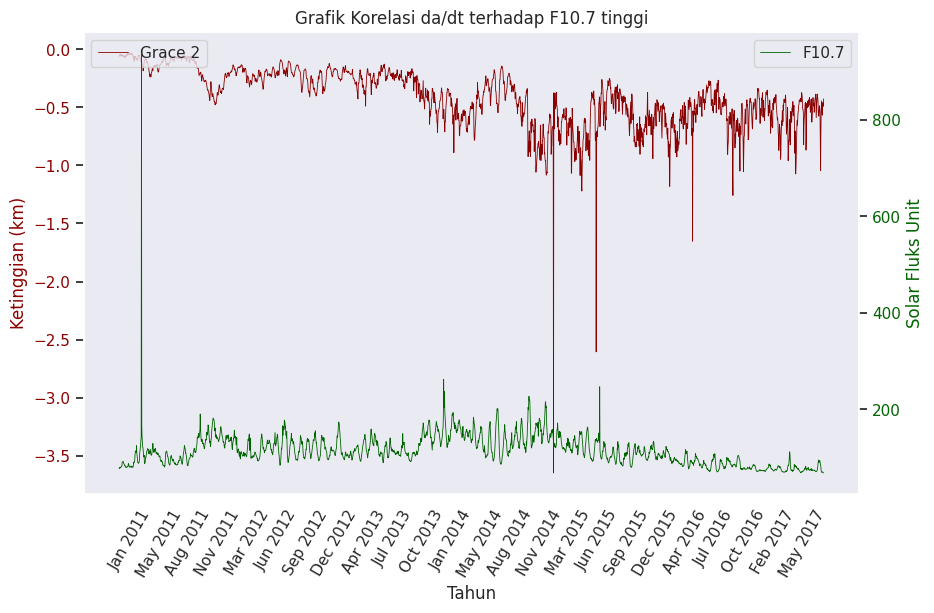

Korelasi antara dh/dt terhadap F10.7*: -0.0802935499433706
P-value: 7.889996410119857e-05


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan variabel x dan dua variabel y
data2 = df2['DATE']
y1 = df2["F10.7_OBS"]
data = da_dt
data3 = df1["EQ"]
y4 = df1["MID"]
y5 = df1["POL"]
b=df['BSTAR']



data=data.iloc[3200:-150]
data2=data2.iloc[3200:-150]
data3=data3.iloc[3200:-150]
y1= y1.iloc[3200:-150]
b=b.iloc[3200:-150]
# Buat plot
sns.set_style("dark")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 0.6})
fig, ax1 = plt.subplots(figsize=(10, 6))

# Atur sumbu y1 dan plot data y1
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Ketinggian (km)', color='darkred')
ax1.plot(data2,data, color='darkred', label='Grace 2')
#ax1.plot(x, y2, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='darkred')
plt.legend(loc='upper left')
plt.xticks(data2, data2.dt.strftime('%b %Y'), rotation=60)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(data2) // 84))

# Buat sumbu y3 dan plot data y3
ax2 = ax1.twinx()
ax2.set_ylabel('Solar Fluks Unit', color='darKgreen')
ax2.plot(data2, y1, color='darkgreen', label='F10.7')
#ax2.plot(x, y4, color='tab:blue')
#ax2.plot(x, y5, color='tab:purple')
ax2.tick_params(axis='y', labelcolor='darkgreen')



plt.legend(loc='upper right')
# Atur judul grafik dan tampilkan
plt.title("Grafik Korelasi da/dt terhadap F10.7 tinggi")
plt.show()


#------------------------------------------------------------------------------------------------------------------
import pandas as pd
from scipy.stats import spearmanr

# Hitung korelasi Spearman antara data TEC dan peluruhan orbit

corr3, p_value3 = spearmanr(data, y1)


# Print hasil korelasi
print('Korelasi antara dh/dt terhadap F10.7*:', corr3)
print('P-value:', p_value3)
